 # Multi-Class Obesity Prediction

## Table of Contents

#### 1. Data Description
   - Shape of the dataset
   - Description of columns
   - Number of numeric features
   - Number of categorical features
   - Summary of the data 
   
#### 2. Data Preprocessing
   - Converting floating values to integer (excluded Weight and Height)
   - Label Encoding categorical features
   
#### 3. Data Visualization
   - Distribution of Obesity Levels across Population
   - Segmentation of Obesity Levels by Gender
   - Distribution of Obesity Levels by Transport
   - Clustering of Obesity Types 

#### 4. Data Preparation for Modelling
   - Ordinal Feature Encoding
   - Separate Target Encoding

#### 5.  Data Modelling
   - Decision Tree Classifier
   - Random Forest Classifier
   - XGBoost classifier
   - Neural Network
   
#### 6. Submission

### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')

train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### Shape of the dataset

The dataset has 20,758 records and 18 columns each representing a feature.

In [3]:
train.shape

(20758, 18)

### Description of dataset

This part tells us the shape of the dataset, column names and their respective datatype and non null values.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

### Description of columns

- **id**: A unique identification number of an individual.
- **Gender**: The identity of the person. Either male or female.
- **Age**: The age of the person.
- **Height**: The height of the person.
- **Weight**: The calculated weight of the person.
- **family_history_with_overweight**: An indicator to show that the person has      family history suffering from overweight
- **FAVC**: Frequent consumption of high calorific food tells if the individual often eats high calorific food(Yes/no).
- **FCVC**: Frquency of consumption of vegetables shows the average quantity (in kgs) of vegetables an individual eats on daily basis.
- **NCP**: Ordinal variable that shows how many meals the individual has daily:
  - 1: Between 1 and 2
  - 2: More than Two
  - 3: More than three
  - 4: No Answer
- **CAEC**: Categorical variable that shows how often the individual eats food between meals.The categories are "Never","Sometimes","Frequently","Always".
- **Smoke**: Categorical variable that indicates whether the individual smokes or not. The categories are "yes" and "no".
- **CH2O**: Ordinal variable that shgow how many litres of water an individual drinks daily.
   - 1: Less than a litre
   - 2: Between 1 and 2 litres
   - 3: More than 2 litres
- **SCC** : Categroical variable that shows if individual takes care of calorific intake
- **CALC** : Categorical variable that indicates how often the individual drinks alcohol. The categories are sometimes,no, frequently.
- **MTRANS**: Categorical variable to indicate the mode of transportation the individual uses.
  - Public Transportation
  - Automobile
  - Walking
  - Bike
  - Motorbike
- **NObeyesdad**: Categorical variable taht show the obesity level of individual accoring to their BMI.
  - Normal Weight
  - Insufficient Weight
  - Obesity_Type_I
  - Obesity_Type_II
  - Obesity_Type_III
  - Overweight_Level_I
  - Overweight_Level_II

 


## Data Preprocessing

### Converting Floating Point Values to Integer
​
- Select the columns with floating point values such as 'Age','FCVC', 'NCP','CH20','FAF','TUE'.  
- Do not select 'Height' and 'Weight' columns as there are meant to be in floating point.
- Convert the columns with floating point values to integer values.
- Assign the integer values to their respective column.
- Do the same for test data.

Integer values are a good representation of 'Age', 'CH20'(Litres of water drink) etc.

In [5]:
columns_to_mutate = train.select_dtypes(include = 'number').drop(['Height','Weight'],axis =1).columns

train[columns_to_mutate]= train.select_dtypes(include = 'number').drop(['Height','Weight'],axis =1).applymap(np.int64)
test[columns_to_mutate] = test.select_dtypes(include = 'number').drop(['Height','Weight'],axis =1).applymap(np.int64)

### Rounding 'Height'and 'Weight' columns

In [6]:
# Keeping height and weight values upto two decimal places

train[['Height','Weight']] = train[['Height','Weight']].round(2)
test[['Height','Weight']] = test[['Height','Weight']].round(2)

In [7]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26,1.85,120.64,yes,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation
1,20759,Female,21,1.60,66.00,yes,yes,2,1,Sometimes,no,3,no,1,0,Sometimes,Public_Transportation
2,20760,Female,26,1.64,111.60,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation
3,20761,Male,20,1.55,103.67,yes,yes,2,2,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation
4,20762,Female,26,1.63,104.84,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation


In [8]:
pd.set_option('display.max_colwidth', None)

cat_df = train.select_dtypes(exclude ='number')
labels = train.select_dtypes(exclude ='number').columns
unique_val = [','.join(cat_df[i].unique()) for i in  labels]
pd.DataFrame({'Columns':labels,'Column_values': unique_val})

,Columns,Column_values
0,Gender,"Male,Female"
1,family_history_with_overweight,"yes,no"
2,FAVC,"yes,no"
3,CAEC,"Sometimes,Frequently,no,Always"
4,SMOKE,"no,yes"
5,SCC,"no,yes"
6,CALC,"Sometimes,no,Frequently"
7,MTRANS,"Public_Transportation,Automobile,Walking,Motorbike,Bike"
8,NObeyesdad,"Overweight_Level_II,Normal_Weight,Insufficient_Weight,Obesity_Type_III,Obesity_Type_II,Overweight_Level_I,Obesity_Type_I"


## Data Visualization

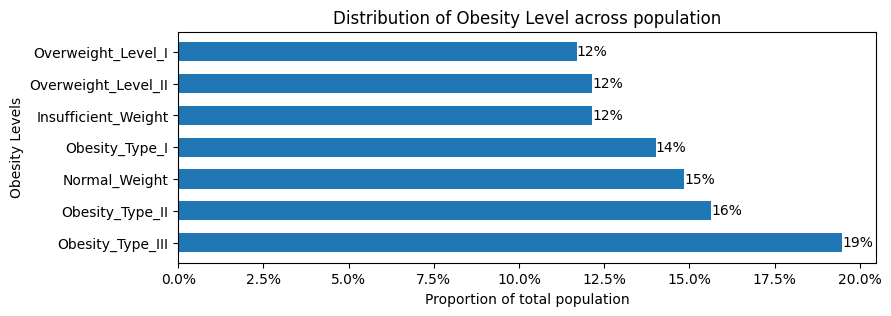

In [9]:
import matplotlib.ticker as mtick

fig,ax = plt.subplots(figsize = (9,3))

df = pd.DataFrame({'count':train['NObeyesdad'].value_counts()}).reset_index()

df['count'] = df['count'].apply(lambda x: ((x/df['count'].sum())*100))
labels = df['count'].round().astype('int').astype('str') +'%'

# Creating a barplot
 
ax.barh(width = df['count'],y = df['NObeyesdad'],height=0.6)
ax.set(
    xlabel= 'Proportion of total population', 
    ylabel = 'Obesity Levels', 
    title = 'Distribution of Obesity Level across population',
    
)
# Adding percenatges to plot
for container in ax.containers:
    ax.bar_label(container, labels=labels,fmt= '%d' )
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())

Text(0.5, 1.0, 'Segmentation of Obesity Levels by Gender')

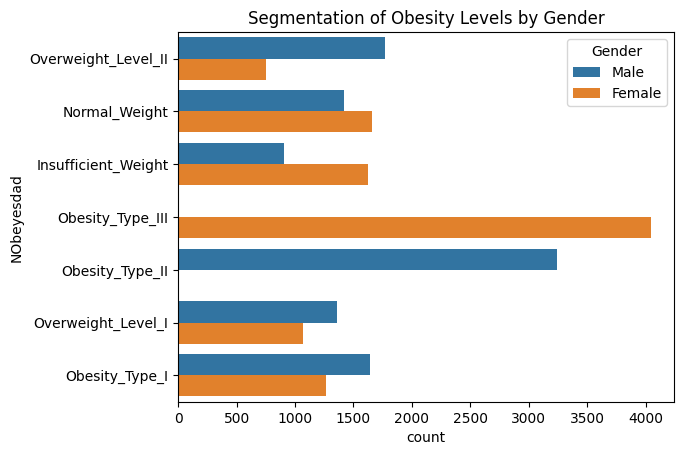

In [10]:
sns.countplot(data = train, y = 'NObeyesdad', hue = 'Gender' ).set_title('Segmentation of Obesity Levels by Gender')

Text(0.5, 1.0, 'Daily Consumption of vegetables vs Obesity Levels')

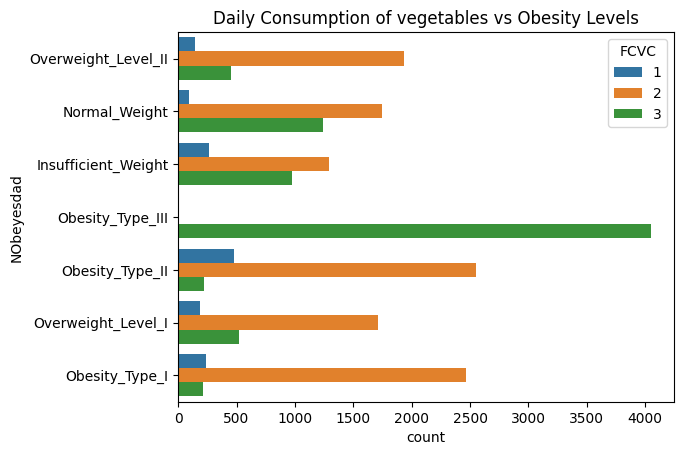

In [11]:
sns.countplot(train,  y= 'NObeyesdad', hue = 'FCVC').set_title('Daily Consumption of vegetables vs Obesity Levels')

- Individuals suffering from Obesity Type III consumed over three kgs of vegetables daily.
- Over 2000 individuals,who consumed 2kgs of vegetables a day, was found to have Obesity Type I and Obesity Type II. 

Text(0.5, 1.0, 'Distribution of Obesity Types by Transportation ')

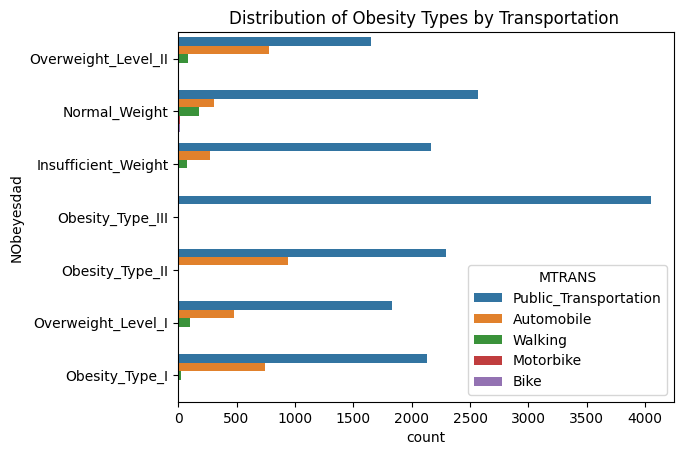

In [12]:
sns.countplot(train, y= 'NObeyesdad', hue ='MTRANS').set_title('Distribution of Obesity Types by Transportation ')


Individuals who usually take public transportation than other types of transports were higher in number among diifrent obesity levels.

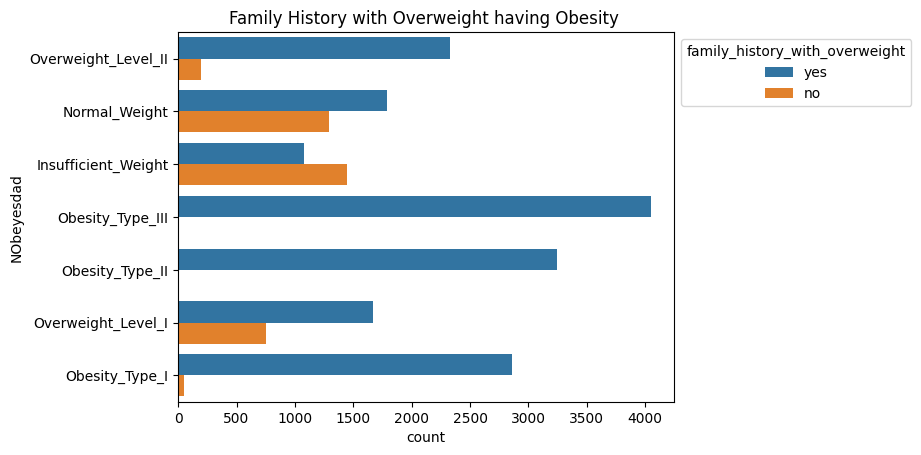

In [13]:
ax = sns.countplot(train, y= 'NObeyesdad', hue = 'family_history_with_overweight' )
ax.set_title('Family History with Overweight having Obesity ')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Individuals who had a family history with overweight were found to be higher in number among all kinds of obesity level.

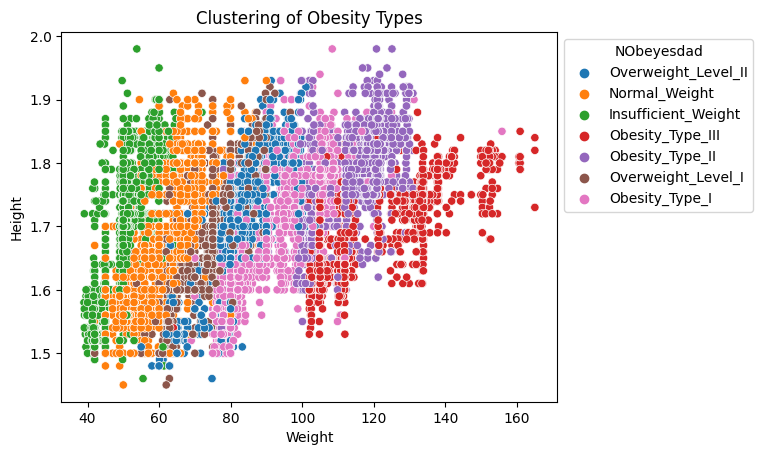

In [14]:
ax = sns.scatterplot(data = train, y = 'Height', x ='Weight', hue = 'NObeyesdad') 
ax.set_title('Clustering of Obesity Types')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Data Preparation for Modelling

### Ordinal Feature Encoding

In [15]:
vars_to_encode = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS' ]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in vars_to_encode:
    train[col] = le.fit_transform(train[col])
    
for col in vars_to_encode:
    test[col] = le.fit_transform(test[col])

### Separate label encoding for target 

- Encoded target'NObeyesdad' to numeric values.
- Created a dictionary to store the original target labels and their respective encoded values.

In [16]:
target = train['NObeyesdad']
target_encode = le.fit_transform(target)

target_df = pd.DataFrame({'NObeyesdad':target_encode})
train = pd.merge(train,target_df ,on= train.index).iloc[:,1:]

#  Storing labels and encoded values
sorted_labels = train.iloc[:,-2:].sort_values(by = 'NObeyesdad_y').drop_duplicates().reset_index()
df_lables = sorted_labels.iloc[:,1:].rename(columns = {'NObeyesdad_x':'value','NObeyesdad_y':'key'}) 
label_dict = df_lables.set_index('key').T.to_dict()


target_labels = train.iloc[:,-2:].sort_values(by = 'NObeyesdad_y').drop_duplicates().reset_index().set_index('NObeyesdad_y').iloc[:,1]
target_labels = np.array(target_labels)

train = train.rename(columns = {'NObeyesdad_y':'NObeyesdad'}).drop('NObeyesdad_x',axis=1)

train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24,1.70,81.67,1,1,2,2,2,0,2,0,0,0,1,3,6
1,1,0,18,1.56,57.00,1,1,2,3,1,0,2,0,1,1,2,0,1
2,2,0,18,1.71,50.17,1,1,1,1,2,0,1,0,0,1,2,3,0
3,3,0,20,1.71,131.27,1,1,3,3,2,0,1,0,1,0,1,3,4
4,4,1,31,1.91,93.80,1,1,2,1,2,0,1,0,1,0,1,3,6


## Modelling

*  DecisionTreeClassifier
*  Random Forest Classifier
*  XGBoost
*  Deep Learning

In [17]:
# Splitting the train data 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

train_temp = train.copy(deep =True) 
target = train_temp.pop('NObeyesdad')
    
X_train,X_test,Y_train,Y_test = train_test_split(train_temp,target,test_size =0.3,random_state = 41)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((14530, 17), (6228, 17), (14530,), (6228,))

### Decision Tree Classifier

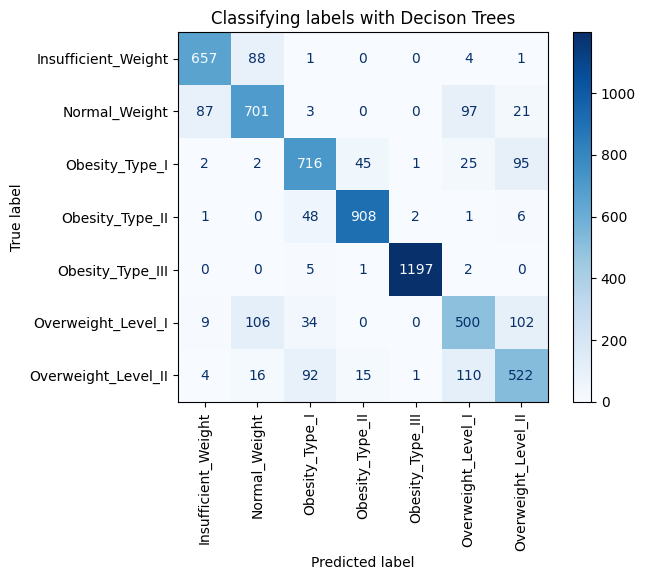

In [18]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

clf = tree.DecisionTreeClassifier()

model = clf.fit(X_train,Y_train)
pred = model.predict(X_test)

# Craeting a confusion matrix
cm = confusion_matrix(Y_test,pred)

# Displaying the matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = target_labels)
disp.plot(cmap=plt.cm.Blues )
plt.xticks(rotation = 90 )
plt.title('Classifying labels with Decison Trees')
plt.show()

In [19]:
accuracy_score(Y_test,pred)

0.8350995504174695

#### Model Accuracy: 
Decison tree classifier yields 84% matches between predicted obesity levels and true obesity levels.

### Random Forest Classifier

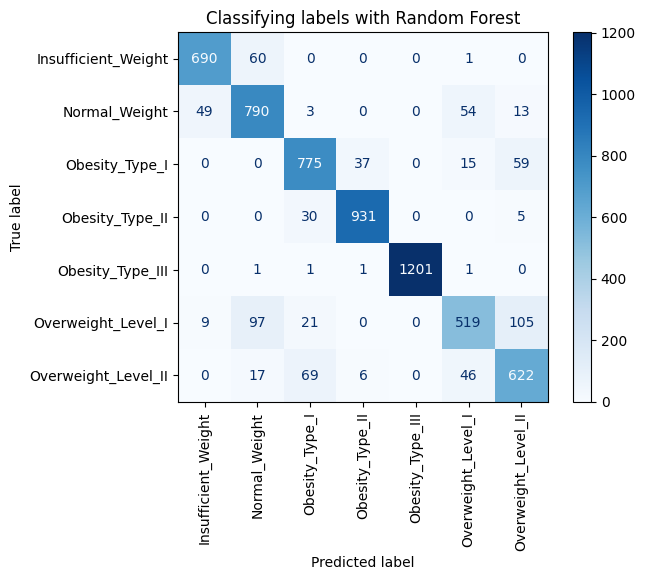

In [20]:
from sklearn.ensemble import RandomForestClassifier


rclf = RandomForestClassifier()
model = rclf.fit(X_train,Y_train)

pred = model.predict(X_test)

cm = confusion_matrix(Y_test,pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = target_labels)
disp.plot(cmap = plt.cm.Blues)

plt.xticks(rotation = 90)
plt.title('Classifying labels with Random Forest')
plt.show()

 


In [21]:
accuracy_score(Y_test,pred)

0.8876043673731535

#### Accuracy: 
The random forest classifier outperforms decison tree classifier with a 89% accuracy in correctly classifying the true labels.

### XGBoost

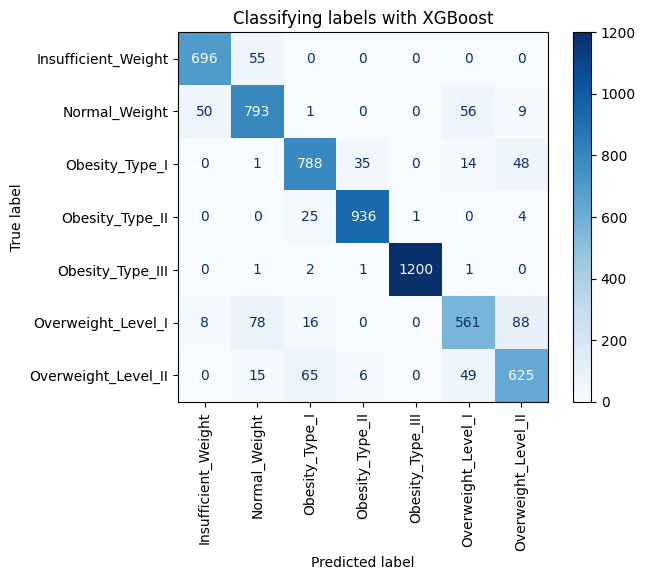

In [22]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    learning_rate = 0.01,
    n_estimators =1000,
    max_depth=8,
    min_child_weight=4,
    gamma =0,
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

 
xgb_model.fit(X_train,Y_train)

predictions = xgb_model.predict(X_test)

cm = confusion_matrix(Y_test,predictions)

disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = target_labels)
disp.plot(cmap = plt.cm.Blues)

plt.xticks(rotation = 90)
plt.title('Classifying labels with XGBoost')
plt.show()

In [23]:
accuracy_score(Y_test,predictions)

0.8990044958253051

### Neural Network

In [24]:
!pip install scikeras
!pip install np_utils

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
from keras.optimizers import Adam

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import pipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 685.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=08492d54e6d01a45956209f8d0d9b5e1b19da7c282d3dbb83f07a2f93ed509a2
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


2024-02-29 10:39:16.082093: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 10:39:16.082217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 10:39:16.255365: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
model = Sequential()
model.add(Dense(17, input_dim=17, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(7, activation='softmax'))
# Compile model

opt = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  

history = model.fit(X_train, Y_train, validation_data= (X_test,Y_test), epochs=100)

Epoch 1/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1514 - loss: 149.7865 - val_accuracy: 0.1434 - val_loss: 18.9751
Epoch 2/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1893 - loss: 9.4095 - val_accuracy: 0.2303 - val_loss: 3.0515
Epoch 3/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2501 - loss: 3.2717 - val_accuracy: 0.2153 - val_loss: 4.9729
Epoch 4/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3007 - loss: 2.4701 - val_accuracy: 0.2948 - val_loss: 1.9658
Epoch 5/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3504 - loss: 1.8883 - val_accuracy: 0.2388 - val_loss: 3.3207
Epoch 6/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3898 - loss: 1.6836 - val_accuracy: 0.3942 - val_loss: 1.5656
Epoch 7/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4322 - loss: 1.4195 - val_accuracy: 0.5034 - val_loss: 1.1754
Epoch 8/100
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4682 - loss: 1.2836 - val_a

In [26]:
pred = model.predict(X_test)
accuracy_score(Y_test, np.argmax(pred,axis=-1))

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.7508028259473346

#### Neural Network Accuracy: 
The neural network achieved an accuracy of 76% in correctly classfying the true labels.

### Conclusion

Among all these models, **Extreme gradient boosting** model achieved an accuracy of 90% in correctly classifying the true labels.

In [27]:
pred = xgb_model.predict(test)

pred_labels = [label_dict[i] for i in pred]
 
final_df = pd.merge(test,pd.DataFrame(pred_labels),on=test.index).rename(columns = {'value':'NObeysedad'})
 
submission = final_df.loc[:,['id','NObeysedad']]

submission.to_csv('submission.csv',index = False)

 